 0. Import the relevant libraries and packages

In [141]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


# Creating the choice set
From   
![image.png](https://cdn.jamanetwork.com/ama/content_public/journal/psych/938422/m_yoi190087ea.png?Expires=1691689740&Signature=OvJ06Ayrw5fJLEycmRUj9I6GyITQwp89ZN5rVQDOm8dU1z6ZvhwNCwFV8yKnBDDEgxFqnaUQWgV7viAKHn5NpRdiVPo-Rgc8kjwYTn-0dnbudBGSoeVtaw8gTSIUiLLnWWVj2sPafVJA9NhK3bivpgCt2RLxI2UJRYUuNUmrrx1CFwyJTKYPlljeVSSEZ3Iwc9dNmvZ4p71MmTQSt8a9KcXSmZ0r0IZhQ187TDnqEFIiAN3mv9A7snMUAnhROj0Fg1p5COdoTVA9Z3RVNw8AT8QgJNSKl44244OjAauQwcnETbDdh2NPeCv4NGXYVclFTopaMriRPqUO4y-QPdDQjw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

We now have all the elements to calculate subjective value.


In [142]:
''' Input should have this form

cols = ['crdm_lott_amt', 'crdm_lott_p', 'crdm_amb_lev', 'alpha', 'beta', 'gamma']

df_indif = pd.DataFrame([[20, 50, 0, 0.495323857, 0.495323857, 4.100226383]], columns= cols)
print(df_indif)
filename = 'csv/example_input.csv'
df_indif.to_csv(filename)

'''
subject_SE = 'csv/subject_input.csv'
df = pd.read_csv(subject_SE) 
df

,Unnamed: 0,crdm_lott_amt,crdm_lott_p,crdm_amb_lev,alpha,beta,gamma
0,0,20.0,50.0,0.0,0.495324,0.22168,4.100226


In [143]:
#Declare the variables
p = df['crdm_lott_p'].values[0]/100  #This is the probability of reward
v = df['crdm_lott_amt'].values[0] #The amount to be gained
alpha = df['alpha'].values[0] #Participant's or ADO alpha parameter
beta = df['beta'].values[0] #Participant's or ADO beta parameter
A= df['crdm_amb_lev'].values[0] #Ambiguity level

#SV calculation and our probabilities options
sv = (p - beta*A/2)*v**alpha  
p_options = [0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13]

#Confirme the SE trial structure
print ('The probability of reward: ' + str(p))
print ('The amount to be earned: ' + str(v))
print ('The alpha parameter from the model: ' + str(alpha))
print ('The beta parameter from the model: ' + str(beta))
print ('The ambiguity level of the SE trial: ' + str(A))
print('The SV of the equivalence trial is ' + str(sv))


The probability of reward: 0.5
The amount to be earned: 20.0
The alpha parameter from the model: 0.495323857
The beta parameter from the model: 0.221680178
The ambiguity level of the SE trial: 0.0
The SV of the equivalence trial is 2.204962459791904


From the SV, we compute V, using the formula:

# $v = \left(\frac{SV}{p-\frac{\beta A}{2}}\right)^\frac{1}{\alpha}$


# 2. Create the choice set. 
- We want to make 3 trials around the point of subjective equality. 

- We want 2 extreme trials. One at $50 and one at the -SV of the 50\$ trial for each probability option. 

- We want 4 intermediate trials.  


In [144]:
#First, we compute the Subjective indiference trials.

def SE_options(sv, alpha, beta, A): #This function take as parameters SV, alpha, beta and ambiguity level
  valuesP = {} #The output will be an empty dictionary with the probabilities as keys and rewards as values.
  for p in p_options: #A loop to iterate through all the probabilities optins.
    v_new = (sv / (p-beta*A/2)) ** (1 / alpha)
    valuesP[p] = v_new #for every p it includes the calculated value
  return valuesP


new_choicesp = SE_options(sv, alpha,beta,A)
SE_trials = {k: round(v, 2) for k, v in new_choicesp.items()}
print('Trials with the same subjective value for all of our Prob options: \n' + str(SE_trials))


Trials with the same subjective value for all of our Prob options: 
{0.87: 6.54, 0.75: 8.82, 0.62: 12.95, 0.5: 20.0, 0.38: 34.81, 0.25: 81.05, 0.13: 303.48}


- Next, we create new trials by adding and substracting \$2 from the SE trials values.

In [145]:
#Centered around subjective indifference +/- and $2
def centered ():
  cent_trials1 = {}
  for k,v1 in SE_trials.items():
    cent_trials1[k] = [float(v1) - 2.0,float(v1) + 2.0]
  return cent_trials1

cent_trials1 = centered()
print("Trials centered + - $2 around SE \n" + str(cent_trials1))

Trials centered + - $2 around SE 
{0.87: [4.54, 8.54], 0.75: [6.82, 10.82], 0.62: [10.95, 14.95], 0.5: [18.0, 22.0], 0.38: [32.81, 36.81], 0.25: [79.05, 83.05], 0.13: [301.48, 305.48]}


In [146]:
#Trials around SE (including the SE)
cent_trials = {}
for prob in SE_trials:
    value1 = float(SE_trials[prob]) #We convert the values in SE_trials into floats
    value2 = cent_trials1[prob] #We call the values from the cent_trials 1 dict. This have the plus/minus $2 but without the SE trials
    cent_trials[prob] = [value1] + value2 #Join the SE trials and the plus/minus $2 tirals
cent_trials
print('Trials around the SE and + - \$2: \n', cent_trials)

Trials around the SE and + - \$2: 
 {0.87: [6.54, 4.54, 8.54], 0.75: [8.82, 6.82, 10.82], 0.62: [12.95, 10.95, 14.95], 0.5: [20.0, 18.0, 22.0], 0.38: [34.81, 32.81, 36.81], 0.25: [81.05, 79.05, 83.05], 0.13: [303.48, 301.48, 305.48]}


In [147]:
# Make it a CSV
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(cent_trials.items()), columns=['p_reward', 'value_reward'])
df = df.explode('value_reward')
# Specify the filename for the new CSV file
cent_trialsCSV = 'csv/cent_trials.csv'

# Save the DataFrame to a CSV file
df.to_csv(cent_trialsCSV, index=False)

print(f"CSV file '{cent_trialsCSV}' created successfully.")
pd.read_csv(cent_trialsCSV)

CSV file 'csv/cent_trials.csv' created successfully.


,p_reward,value_reward
0,0.87,6.54
1,0.87,4.54
2,0.87,8.54
3,0.75,8.82
4,0.75,6.82
5,0.75,10.82
6,0.62,12.95
7,0.62,10.95
8,0.62,14.95
9,0.50,20.00


**Extreme trials:**

To create trials far way from the subjective equality point (SEP). We first make trials with a Value of reward of $50, which is the maximum amount we can pay to participants. Thus this is the highest subjective value we can reach.

In [148]:
extrpos = {} #Create an empty dict
for p in p_options: #Iterate through the probability levels
    extrpos[p] = 50 #Assign them the 50 dollars value
print(extrpos)

{0.87: 50, 0.75: 50, 0.62: 50, 0.5: 50, 0.38: 50, 0.25: 50, 0.13: 50}


In [149]:
#Now, lets calculate the SV of each extreme positive trial
svpos = []
for p in p_options:
    sv2 = (p - beta*A/2)*50**alpha 
    svpos.append(sv2)
svpos

[6.040315564667845,
 5.2071685902309,
 4.304592701257544,
 3.4714457268206003,
 2.638298752383656,
 1.7357228634103001,
 0.902575888973356]

In [150]:
#Now, lets calculate the SV of each extreme Negative trial
svevil = []
for p in p_options:
    sv = (p - beta*A/2)*50**alpha 
    negsv = -sv
    svevil.append (negsv) 
svevil

[-6.040315564667845,
 -5.2071685902309,
 -4.304592701257544,
 -3.4714457268206003,
 -2.638298752383656,
 -1.7357228634103001,
 -0.902575888973356]

In [151]:
# Convert the dictionary to a DataFrame
df1 = pd.DataFrame(SE_trials.items(), columns=['p_reward', 'SE_reward'])
#p_reward = df1['p_reward'].values
#value_reward = df1['value_reward'].values
df1['SV_SE_reward'] = (df1['p_reward'] - beta*A/2)*df1['SE_reward']**alpha
df1['SV_safe'] = 5.0**alpha
df1['MaxReward'] = 50
df1['SV_MaxReward'] = svpos
df1['deltaSV'] = df1['SV_MaxReward'] - df1['SV_SE_reward']
df1['SV_evil'] = df1['SV_SE_reward'] - df1['deltaSV'] 
df1

,p_reward,SE_reward,SV_SE_reward,SV_safe,MaxReward,SV_MaxReward,deltaSV,SV_evil
0,0.87,6.54,2.205436,2.219303,50,6.040316,3.834880,-1.629444
1,0.75,8.82,2.204826,2.219303,50,5.207169,3.002342,-0.797516
2,0.62,12.95,2.204578,2.219303,50,4.304593,2.100015,0.104563
3,0.50,20.00,2.204962,2.219303,50,3.471446,1.266483,0.938479
4,0.38,34.81,2.205090,2.219303,50,2.638299,0.433208,1.771882
5,0.25,81.05,2.204910,2.219303,50,1.735723,-0.469187,2.674098
6,0.13,303.48,2.204964,2.219303,50,0.902576,-1.302389,3.507353


In [152]:
#Exclude those trials for whom the SV of the maximum reward is less than SV of the SE
#This is the same as excluding those trials with SE points greater than $50
df5 = df1[df1['SV_MaxReward']> df1['SV_SE_reward']]
df5

,p_reward,SE_reward,SV_SE_reward,SV_safe,MaxReward,SV_MaxReward,deltaSV,SV_evil
0,0.87,6.54,2.205436,2.219303,50,6.040316,3.834880,-1.629444
1,0.75,8.82,2.204826,2.219303,50,5.207169,3.002342,-0.797516
2,0.62,12.95,2.204578,2.219303,50,4.304593,2.100015,0.104563
3,0.50,20.00,2.204962,2.219303,50,3.471446,1.266483,0.938479
4,0.38,34.81,2.205090,2.219303,50,2.638299,0.433208,1.771882


Now, let's find out what Value produces that SV_evil for all the probability levels

  **If SV<0:** 
# $v_{\text{evil}} = - \left( \frac{\left| SV \right|}{p - \frac{\beta \cdot A}{2}} \right) ^{\frac{1}{\alpha}}$

**BIG ASSUMPTION**
- In the previous formula, we are assuming that losses are represented equally than gains. 

In [153]:
SV_evil = df5.set_index('p_reward')['SV_evil'].to_dict() #Create a dictionary using Probability as key and SV_evil as a value
SV_evil

{0.87: -1.6294444870178513,
 0.75: -0.7975156961353616,
 0.62: 0.10456301490286268,
 0.5: 0.9384791927632081,
 0.38: 1.7718818572597947}

In [154]:
def ExtrNeg_options(SV_evil, alpha, beta, A):
    NegvaluesP = {}  # The output will be an empty dictionary with the probabilities as keys and rewards as values.
    for p, sv1 in SV_evil.items():  # A loop to iterate through all the probabilities options.
        if sv1 < 0.0:
            v_evil = - (abs(sv1) / (p - beta * A / 2)) ** (1 / alpha)  # Assuming losses are represented equally than gains!
        else:
            v_evil = (sv1 / (p - beta * A / 2)) ** (1 / alpha)

        NegvaluesP[p] = v_evil  # for every p it includes the calculated value

    return NegvaluesP

# Call the function and store the result
NegvaluesP = ExtrNeg_options(SV_evil, alpha, beta, A)
ExtrNeg = {k: round(v, 2) for k, v in NegvaluesP.items()}
print('Trials with the least SV for every prob option: \n' + str(ExtrNeg))


Trials with the least SV for every prob option: 
{0.87: -3.55, 0.75: -1.13, 0.62: 0.03, 0.5: 3.57, 0.38: 22.38}


In [155]:
# Make it a CSV
# Convert the dictionary to a DataFrame
df2 = pd.DataFrame(extrpos.items(), columns=['p_reward', 'value_reward'])
df3 = pd.DataFrame(ExtrNeg.items(), columns=['p_reward', 'value_reward'])
df4 = pd.concat([df2,df3], ignore_index=True)
# Specify the filename for the new CSV file
Extr_trialsCSV = 'csv/Extr_trials.csv'

# Save the DataFrame to a CSV file
df4.to_csv(Extr_trialsCSV, index=False)

print(f"CSV file '{Extr_trialsCSV}' created successfully.")
pd.read_csv(Extr_trialsCSV)


CSV file 'csv/Extr_trials.csv' created successfully.


,p_reward,value_reward
0,0.87,50.00
1,0.75,50.00
2,0.62,50.00
3,0.50,50.00
4,0.38,50.00
5,0.25,50.00
6,0.13,50.00
7,0.87,-3.55
8,0.75,-1.13
9,0.62,0.03


# 4. The new choices CSV

In [156]:
#Final CSV
Extr_trialsCSV = pd.read_csv(Extr_trialsCSV)
cent_trialCSV = pd.read_csv(cent_trialsCSV)

#Complete trials CSV
crdm_trials = pd.concat([cent_trialCSV, Extr_trialsCSV])
crdm_trialsCSV = 'csv/crdm_trials.csv'
crdm_trials.to_csv(crdm_trialsCSV, index = False)
print(f"CSV file concatenated successfully.")
pd.read_csv(crdm_trialsCSV)

CSV file concatenated successfully.


,p_reward,value_reward
0,0.87,6.54
1,0.87,4.54
2,0.87,8.54
3,0.75,8.82
4,0.75,6.82
5,0.75,10.82
6,0.62,12.95
7,0.62,10.95
8,0.62,14.95
9,0.50,20.00


In [157]:
# Filter rows where 'value_reward' is less than or equal to 50
crdm_50filtered = crdm_trials[crdm_trials['value_reward'] <= 60]

# Specify the filename for the new CSV file with the filtered data
crdm_trials_50cap = 'csv/crdm_trials_50cap.csv'

# Save the filtered DataFrame to a new CSV file
crdm_50filtered.to_csv(crdm_trials_50cap, index=False)

print(f"CSV file filtered successfully.")
pd.read_csv(crdm_trials_50cap)

CSV file filtered successfully.


,p_reward,value_reward
0,0.87,6.54
1,0.87,4.54
2,0.87,8.54
3,0.75,8.82
4,0.75,6.82
5,0.75,10.82
6,0.62,12.95
7,0.62,10.95
8,0.62,14.95
9,0.50,20.00


# 5. Let's check that it works

Hey Santiago. I think for visualization, it would be helpful 
if you edit the scatter plot in the following way:
Compute SV_delta = SV_lottery - SV_safe then plot SV_delta as
a function of v_reward
Include the maximum value for the reward as red vertical lines 
at x = +50 and another at x = -50
Project the scatterplot as histograms on each axis

In [170]:
df = pd.read_csv(crdm_trials_50cap)
df['SV_reward'] = (df['p_reward'] - beta*A/2)*df['value_reward']**alpha
df.loc[df['value_reward'] == -3.55, 'SV_reward'] = -1.629444
df.loc[df['value_reward'] == -1.13, 'SV_reward'] = -0.797516
df['SV_safe'] = 5.0**alpha
df['deltaSV'] = df['SV_reward'] - df['SV_safe']
df

,p_reward,value_reward,SV_reward,SV_safe,deltaSV
0,0.87,6.54,2.205436,2.219303,-0.013867
1,0.87,4.54,1.840665,2.219303,-0.378638
2,0.87,8.54,2.517054,2.219303,0.297752
3,0.75,8.82,2.204826,2.219303,-0.014476
4,0.75,6.82,1.941130,2.219303,-0.278173
5,0.75,10.82,2.439713,2.219303,0.220410
6,0.62,12.95,2.204578,2.219303,-0.014725
7,0.62,10.95,2.028796,2.219303,-0.190507
8,0.62,14.95,2.367116,2.219303,0.147813
9,0.50,20.00,2.204962,2.219303,-0.014340


Text(0, 0.5, 'SV difference (no ambiuguity)')

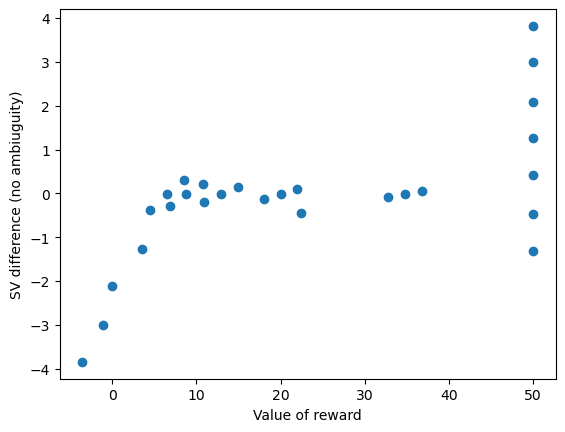

In [171]:
#Scatter Plot
plt.figure()
x = df['value_reward']
y = df['deltaSV']
plt.scatter(x,y)
plt.xlabel('Value of reward')
plt.ylabel('SV difference (no ambiuguity)')


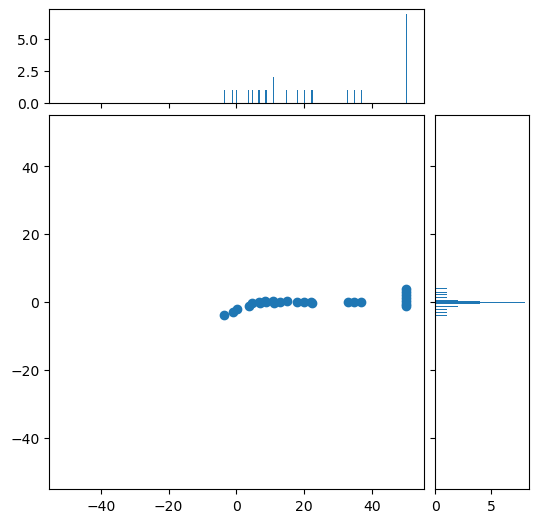

In [178]:
x = df['value_reward'].values
y = df['deltaSV'].values


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')


# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)




# To do:
- Is SV symmetrical in the losses --> prospect theory
- What to when SE_trials_reward > $50?
- Add ambiguity to the choice set. 

    

In [161]:
#Inserting amibuity
import random
df = pd.read_csv(crdm_trials_50cap)

#Define the ambiguity options
crdm_amb_lvl = [24,50,74]


# number of ambiguous trials by type
N_AMB = 10
crdm_amb_opt = [N_AMB*[a] for a in crdm_amb_lvl]
crdm_amb_opt = [item for sublist in crdm_amb_opt for item in sublist]
print(crdm_amb_opt)
random.shuffle(crdm_amb_opt)
print(crdm_amb_opt)



[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74]
[24, 24, 50, 74, 50, 24, 24, 74, 74, 24, 50, 50, 74, 50, 74, 74, 50, 50, 50, 74, 24, 74, 50, 74, 50, 24, 74, 24, 24, 24]


In [162]:

#Define the number of ambiguous trials by picking X number of random rows.
amb_trials = df.sample(n=len(crdm_amb_opt))

#Assign ambiguity values that match the number of random rows
# amb_levels = [random.choice(crdm_amb_opt) for x in range(15)]
#Assign those values to the random rows
amb_trials['crdm_amb_lev'] = crdm_amb_opt
amb_trials





ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:

crdm_trials['crdm_amb_lev'] = 0.0
# choice_set = crdm_trials
choice_set = pd.concat([crdm_trials,amb_trials],ignore_index=True)

print(choice_set)



In [ ]:
import matplotlib.pyplot as plt

choice_set['SV_lottery'] = (choice_set['p_reward'] - beta*(choice_set['crdm_amb_lev']/100.0/2))*choice_set['value_reward']**alpha
choice_set['SV_safe'] = 5.0**alpha
choice_set['SV_diff'] = choice_set['SV_lottery'] - choice_set['SV_safe']
print(choice_set)

plt.figure(1)
plt.hist(choice_set.loc[choice_set['crdm_amb_lev']==0.0,'SV_diff'],bins=10)

plt.figure(2)
plt.hist(choice_set.loc[choice_set['crdm_amb_lev']>0.0,'SV_diff'],bins=10)



NameError: name 'choice_set' is not defined

In [ ]:
plt.figure(4)
x = choice_set.loc[choice_set['crdm_amb_lev']==0.0,'value_reward']
y = choice_set.loc[choice_set['crdm_amb_lev']==0.0,'SV_diff']
plt.scatter(x,y)
plt.xlabel('Value of Reward')
plt.ylabel('SV difference (no ambiuguity)')


plt.figure(5)
x = choice_set.loc[choice_set['crdm_amb_lev']>0.0,'crdm_amb_lev']
y = choice_set.loc[choice_set['crdm_amb_lev']>0.0,'SV_diff']
plt.scatter(x,y)
plt.xlabel('Ambiguity level')
plt.ylabel('SV difference (ambiuguity)')



## It's not much but it's honest work
![python](https://plantillasdememes.com/img/plantillas/no-es-mucho-pero-es-trabajo-honesto01569991155.jpg)